In [77]:
import torch
from torchvision import models
import torchvision.transforms as transforms

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

In [82]:
# Loading the model
model = models.vgg19(pretrained=True).features

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


In [84]:
# Freezing the layers
for param in model.parameters():
  param.requires_grad_(False)

In [85]:
# Select the device available
def get_device():
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")
device = get_device()

In [86]:
device

device(type='cuda')

In [87]:
model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [21]:
# loading content and style images
res = requests.get('https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/style-transfer/images/octopus.jpg')
content = Image.open(BytesIO(res.content)).convert('RGB')

res = requests.get('https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/style-transfer/images/hockney.jpg')
style = Image.open(BytesIO(res.content)).convert('RGB')

In [73]:
# Applying transfroms to the images
height = 400
width = 500
transform = transforms.Compose([
                                transforms.Resize((height,width)),
                                transforms.ToTensor()
                              ])

content_image = transform(content)
style_image = transform(style)

torch.Size([3, 400, 500])
torch.Size([3, 400, 500])


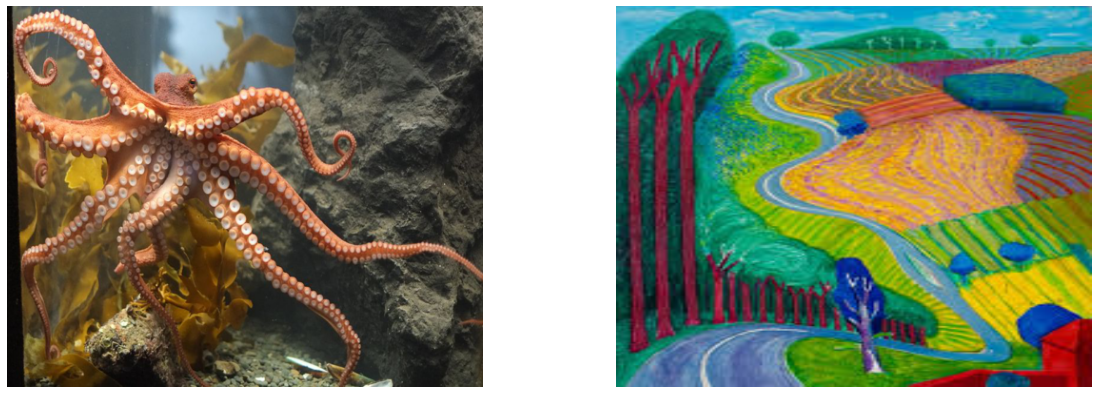

In [75]:
# Displaying the content and style images
print(content_image.shape)
print(style_image.shape)
fig , (ax1,ax2) = plt.subplots(figsize=(20,7),nrows=1,ncols=2)
ax1.imshow(content_image.permute(1,2,0))
ax1.axis("off")
ax2.imshow(style_image.permute(1,2,0))
ax2.axis("off")
plt.show()

In [76]:
# Moving the images to the device
content_image = content_image.to(device)
style_image = style_image.to(device)